## IDEA : Identify and Classify Documents by topic
`Names:`
    - Abdelfattah Mohamed
    - Abdelrahman Ali 
    - Aya Alaa
    - Gehad Radwan

> `Description of our idea:`
    we will use dataset scrapped from Makeup site and make classification on it.
    Dataset : https://github.com/aniass/Extracting-data-using-API or
              https://www.kaggle.com/oftomorrow/herokuapp-makeup-products
    Site Scrapped : http://makeup-api.herokuapp.com/

### 01) Importing packages and loading data

In [1]:
# MATH LIBRARIES
import pandas as pd
import numpy as np
# NLP LIBRARIES
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
# VISUALIZATION LIBRARIES
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# SPLITTING DATA
from sklearn.model_selection import train_test_split
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
# Confusion matrix, Report, Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('dataset/Herokuapp_Makeup_Products.csv', header=0,index_col=0)
df.head()

,product_type,description
0,lip_liner,Lippie Pencil A long-wearing and high-intensit...
1,lipstick,Blotted Lip Sheer matte lipstick that creates ...
2,lipstick,"Lippie Stix Formula contains Vitamin E, Mango,..."
3,foundation,"Developed for the Selfie Age, our buildable fu..."
4,lipstick,All of our products are free from lead and hea...


### 02) Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 930
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_type  906 non-null    object
 1   description   906 non-null    object
dtypes: object(2)
memory usage: 21.2+ KB


In [4]:
# copying df to text_df to work on it
text_df = df.copy()
text_df.head()

,product_type,description
0,lip_liner,Lippie Pencil A long-wearing and high-intensit...
1,lipstick,Blotted Lip Sheer matte lipstick that creates ...
2,lipstick,"Lippie Stix Formula contains Vitamin E, Mango,..."
3,foundation,"Developed for the Selfie Age, our buildable fu..."
4,lipstick,All of our products are free from lead and hea...


In [5]:
# The size of dataset
text_df.shape

(906, 2)

In [6]:
text_df['description'][5]

'Serum Foundations are lightweight medium-coverage formulations available in a comprehensive shade range across 21 shades. These foundations offer moderate coverage that looks natural with a very lightweight serum feel. They are very low in viscosity and are dispensed with the supplied pump or with the optional glass dropper available for purchase separately if preferred. '

In [7]:
# Check missing values ?
text_df.isnull().sum()

product_type    0
description     0
dtype: int64

In [8]:
# Data type change:
text_df['description'] = text_df['description'].astype(str)

In [9]:
# Lenght of characters
text_df['length'] = text_df['description'].apply(len)
text_df.head()

,product_type,description,length
0,lip_liner,Lippie Pencil A long-wearing and high-intensit...,232
1,lipstick,Blotted Lip Sheer matte lipstick that creates ...,146
2,lipstick,"Lippie Stix Formula contains Vitamin E, Mango,...",188
3,foundation,"Developed for the Selfie Age, our buildable fu...",492
4,lipstick,All of our products are free from lead and hea...,357


In [10]:
# MAYBE WILL MAKE THIS OUR CATEGORIES "CLASSES"
text_df.product_type.unique()

array(['lip_liner', 'lipstick', 'foundation', 'eyeliner', 'eyeshadow',
       'blush', 'bronzer', 'mascara', 'eyebrow', 'nail_polish'],
      dtype=object)

In [11]:
# Statistics
text_df['length'].describe()

count     906.000000
mean      648.370861
std       827.022094
min         9.000000
25%       217.000000
50%       357.000000
75%       722.250000
max      5540.000000
Name: length, dtype: float64

In [12]:
# Count values for each class
text_df.product_type.value_counts()

foundation     159
lipstick       148
eyeliner       145
mascara         91
eyeshadow       86
blush           75
bronzer         69
nail_polish     60
eyebrow         45
lip_liner       28
Name: product_type, dtype: int64

In [13]:
'''
Grouping data with similar names
'''
text_df.loc[text_df['product_type'].isin(['eyeliner','eyeshadow','mascara','eyebrow']),'product_type'] = 'eye_makeup'
text_df.loc[text_df['product_type'].isin(['blush','bronzer']),'product_type'] = 'contour'
text_df.loc[text_df['product_type'].isin(['lipstick','lip_liner']),'product_type'] = 'lipstick'

In [14]:
#Check 
'''
After run this cell we will have five group of classes:
Eye makeup 
Lipstick
Foundation
Contour
Nail polish
'''
text_df.product_type.value_counts()

eye_makeup     367
lipstick       176
foundation     159
contour        144
nail_polish     60
Name: product_type, dtype: int64

In [15]:
# Mapping data to numeric data for learning
df_mapping = {
    'eye_makeup': 1,
    'lipstick': 2,
    'foundation': 3,
    'contour': 4,
    'nail_polish': 5}

In [16]:
# Applying
text_df['product_type'] = text_df['product_type'].map(df_mapping)
text_df.head()

,product_type,description,length
0,2,Lippie Pencil A long-wearing and high-intensit...,232
1,2,Blotted Lip Sheer matte lipstick that creates ...,146
2,2,"Lippie Stix Formula contains Vitamin E, Mango,...",188
3,3,"Developed for the Selfie Age, our buildable fu...",492
4,2,All of our products are free from lead and hea...,357


In [17]:
# Statisics for types
text_df.groupby('product_type').describe()

length                                                        \
              count        mean         std   min     25%    50%      75%   
product_type                                                                
1             367.0  671.245232  848.229561  14.0  216.00  341.0   794.50   
2             176.0  561.988636  834.540448   9.0  199.25  311.5   544.00   
3             159.0  686.754717  942.734917  22.0  240.00  366.0   582.00   
4             144.0  707.451389  762.697759  15.0  236.50  403.5  1090.25   
5              60.0  518.333333  342.244469  95.0  218.00  546.5   791.50   

                      
                 max  
product_type          
1             5482.0  
2             5540.0  
3             4830.0  
4             5374.0  
5             1252.0

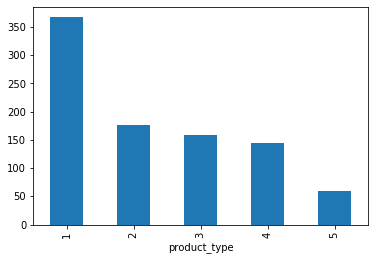

In [18]:
# SIMPLE VISUALIZATION 
text_df.groupby('product_type').description.count().plot.bar(ylim=0)
plt.show()

### 03) Text Pre-processing


> 1- Removing punctions

In [19]:
'''
remove_punctuation method
'''
def remove_punctuation(description):
    table = str.maketrans('', '', string.punctuation)
    return description.translate(table)

In [20]:
# Applying
text_df['description'] = text_df['description'].apply(remove_punctuation)
text_df.head()

,product_type,description,length
0,2,Lippie Pencil A longwearing and highintensity ...,232
1,2,Blotted Lip Sheer matte lipstick that creates ...,146
2,2,Lippie Stix Formula contains Vitamin E Mango A...,188
3,3,Developed for the Selfie Age our buildable ful...,492
4,2,All of our products are free from lead and hea...,357


> 2- Stop words


In [21]:
# stopwords showing
stop = stopwords.words('english')
stop[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [22]:
'''
remove_stopwords method
'''
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

In [23]:
# Applying
text_df['description'] = text_df['description'].apply(remove_stopwords)
text_df.tail()

,product_type,description,length
926,1,fall love pacificas long lasting nourishing na...,1049
927,1,physicians formula organic wear fakeout mascar...,1338
928,1,physicians formula organic wear lash boosting ...,1868
929,1,voluminous volume building waterproof mascara’...,936
930,1,finally natural mascara feel good putting lash...,645


In [24]:
# Test
text_df['description'][5]

'serum foundations lightweight mediumcoverage formulations available comprehensive shade range across 21 shades foundations offer moderate coverage looks natural lightweight serum feel low viscosity dispensed supplied pump optional glass dropper available purchase separately preferred'

> 3- Stemming


In [25]:
porter = PorterStemmer()
'''
Stemmer method
'''
def stemmer(stem_text):
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)

In [26]:
# Applying
text_df['description'] = text_df['description'].apply(stemmer)
text_df.head()

,product_type,description,length
0,2,lippi pencil longwear highintens lip pencil gl...,232
1,2,blot lip sheer matt lipstick creat perfect pop...,146
2,2,lippi stix formula contain vitamin e mango avo...,188
3,3,develop selfi age buildabl full coverag natur ...,492
4,2,product free lead heavi metal paraben phthalat...,357


In [27]:
# Checking
text_df['description'][5]

'serum foundat lightweight mediumcoverag formul avail comprehens shade rang across 21 shade foundat offer moder coverag look natur lightweight serum feel low viscos dispens suppli pump option glass dropper avail purchas separ prefer'

> 4- Part of Speech Tagging


In [28]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/abdelfattah/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
# Testing only
tokens = text_df['description'][5]

nltk.pos_tag(word_tokenize(tokens))

[('serum', 'NN'),
 ('foundat', 'NN'),
 ('lightweight', 'VBD'),
 ('mediumcoverag', 'NNS'),
 ('formul', 'JJ'),
 ('avail', 'NN'),
 ('comprehens', 'NNS'),
 ('shade', 'VBD'),
 ('rang', 'NN'),
 ('across', 'IN'),
 ('21', 'CD'),
 ('shade', 'NN'),
 ('foundat', 'NN'),
 ('offer', 'NN'),
 ('moder', 'NN'),
 ('coverag', 'NN'),
 ('look', 'NN'),
 ('natur', 'JJ'),
 ('lightweight', 'JJ'),
 ('serum', 'NN'),
 ('feel', 'NN'),
 ('low', 'JJ'),
 ('viscos', 'NN'),
 ('dispens', 'VBZ'),
 ('suppli', 'JJ'),
 ('pump', 'NN'),
 ('option', 'NN'),
 ('glass', 'NN'),
 ('dropper', 'NN'),
 ('avail', 'NN'),
 ('purchas', 'NN'),
 ('separ', 'NN'),
 ('prefer', 'VBP')]

> 4- Bag of words
    - CountVectorizer 

In [30]:
'''
COUNT VECTORIZER for ENCODING
'''
vectorizer = CountVectorizer()
vectorizer.fit(text_df['description'])
vector = vectorizer.transform(text_df['description'])

In [31]:
print(vector.shape)
print(vector.toarray())

(906, 5891)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


> 5- TF-IDF
    - Term Frequency–Inverse Document Frequency

In [32]:
# extract tfid 
tfidf_converter = TfidfTransformer()
df_x_tfidf = tfidf_converter.fit_transform(vector).toarray()
df_x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 04) Splitting Data 

In [33]:
X = df_x_tfidf
y = text_df['product_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((679, 5891), (227, 5891), (679,), (227,))

### 05) Build the model

    - The problem: Multi-classification
    - Algorthims: Logistic Regression.

> 5.1) Logistic Regression


In [35]:
LR_Model_log = LogisticRegression()
LR_Model_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# Preparing sets using numpy
ytest = np.array(y_test)
pred = LR_Model_log.predict(X_test)

### 06) Confusion Matrix & Classification Report

In [37]:
print('ACCURACY : %s \n' % accuracy_score(pred, y_test))


ACCURACY : 0.9251101321585903 



In [38]:
print(classification_report(ytest, pred))


              precision    recall  f1-score   support

           1       0.91      0.99      0.95        98
           2       0.95      0.91      0.93        46
           3       0.92      0.86      0.89        28
           4       0.91      0.86      0.89        37
           5       1.00      0.83      0.91        18

    accuracy                           0.93       227
   macro avg       0.94      0.89      0.91       227
weighted avg       0.93      0.93      0.92       227



In [39]:
print(confusion_matrix(ytest, pred))

[[97  0  0  1  0]
 [ 4 42  0  0  0]
 [ 2  0 24  2  0]
 [ 1  2  2 32  0]
 [ 3  0  0  0 15]]


In [40]:
# save the model to disk
import pickle
filename = 'LR_model.sav'
pickle.dump(LR_Model_log, open(filename, 'wb'))

In [41]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9251101321585903


### End of PROJECT